# 

##### Linear Regression Analysis of California Housing Dataset
By: Colin Zhang

I used the California housing dataset from the sample data section of Google Colab to analyze the relationship between the median home value and median income in the state of California. The goal of this project is to predict the median home value based on a given median income.

First, I import the necessary packages for data visualization and analysis. Only the first 10,000 rows of the data are used for time efficiency.

In [154]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load california housing data
test = pd.read_csv('C:/Users/cz400/Desktop/my_repos/atdp-final-project/data/california_housing_test.csv')
train = pd.read_csv('C:/Users/cz400/Desktop/my_repos/atdp-final-project/data/california_housing_train.csv')

# Combine test and train data
data = pd.concat([test, train], axis=0, ignore_index=True)

# Display dataframe info
display(data.head())
display(data.info())

# Extract first 1000 rows of median house value
median_house_value = data['median_house_value'][:10000]
median_income = data['median_income'][:10000]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

#### Exploratory Data Analysis (EDA)

Basic statistics are calculated for the data, such as mean, median, and standard deviation.

In [155]:
# Compute mean, median, and std of data
print(f'Mean house value: ${median_house_value.mean():.2f}')
print(f'Median house value: ${median_house_value.median():.2f}')
print(f'Std house value: ${median_house_value.std():.2f}')
print(f'Mean income (tens of thousands): ${median_income.mean():.2f}')
print(f'Median income (tens of thousands): ${median_income.median():.2f}')
print(f'Std income (tens of thousands): ${median_income.std():.2f}')

Mean house value: $198916.08
Median house value: $174000.00
Std house value: $102875.81
Mean income (tens of thousands): $3.80
Median income (tens of thousands): $3.50
Std income (tens of thousands): $1.82


Graphs of box plots, histograms, and density plots are created to visualize the distribution of the variables and determine whether there are any outliers.

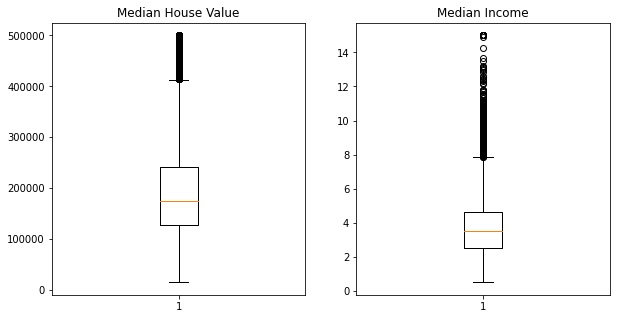

In [157]:
# Create box plots of median house value and median income to see outliers
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axs[0].boxplot(median_house_value)
axs[0].set_title('Median House Value')
axs[1].boxplot(median_income)
axs[1].set_title('Median Income')
plt.show()

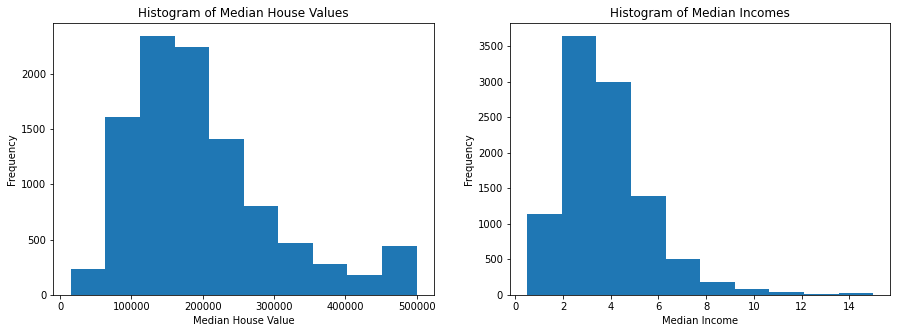

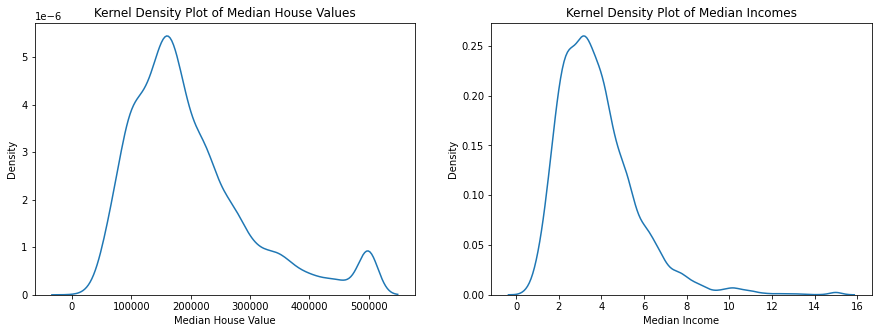

In [158]:
# Create histograms of median house value and median income
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
axs[0].hist(median_house_value)
axs[0].set_xlabel('Median House Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Median House Values')
axs[1].hist(median_income)
axs[1].set_xlabel('Median Income')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram of Median Incomes')
plt.show()

# Create kernel density plots of median house value and median income
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sns.kdeplot(median_house_value, ax = axs[0])
sns.kdeplot(median_income, ax = axs[1])
axs[0].set_xlabel('Median House Value')
axs[0].set_ylabel('Density')
axs[0].set_title('Kernel Density Plot of Median House Values')
axs[1].set_xlabel('Median Income')
axs[1].set_ylabel('Density')
axs[1].set_title('Kernel Density Plot of Median Incomes')
plt.show()

A scatter plot of the explanatory variable (median income) vs. the response variable (median home value) is created. The correlation coefficient is calculated and displayed.

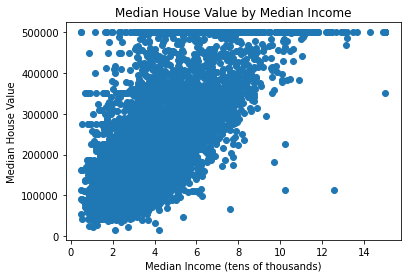

Correlation between median house value and median income: 0.68


In [156]:
# Create a scatter plot of the median house value by the median income
plt.scatter(median_income, median_house_value)
plt.xlabel('Median Income (tens of thousands)') 
plt.ylabel('Median House Value')
plt.title('Median House Value by Median Income')
plt.show()

print(f'Correlation between median house value and median income: {median_house_value.corr(median_income):.2f}')

##### Building the model
I created the model using the LinearRegression class from sklearn. Mean Absolute Percentage Error (MAPE) and R-squared are used as metrics to evaluate the model.

In [159]:
# Import linear regression and metrics from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

The data is split into training and test sets before fitting the model. The model is trained on the training set and the test set is used to evaluate the model.

In [160]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(median_income, median_house_value, test_size=0.2, random_state=0)

The data is converted to numpy arrays before being used in the model to allow for reshaping of the dimensions of the data.

In [161]:
# Convert data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

The model is created and fit on the training data, with reshaping of the dimensions to match the requirements of the sklearn LinearRegression class.

y = 51741.51 + 38680.98x


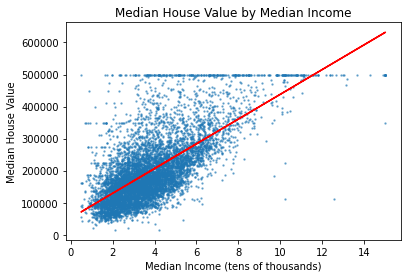

In [162]:
# Create linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train.reshape(-1, 1), y_train)

# Show the linear regression coefficients
print(f'y = {model.intercept_:.2f} + {model.coef_[0]:.2f}x')

# Visualize the linear regression model
plt.scatter(X_train, y_train, s = 2, alpha = 0.5)
plt.plot(X_train, model.predict(X_train.reshape(-1, 1)), color='red')
plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('Median House Value')
plt.title('Median House Value by Median Income')
plt.show()


The trained model is then used to make predictions of median home values for the test data. The mean squared error (mse) and R-squared metrics are calculated and displayed.

In [163]:
# Make predictions on the test set
y_pred = model.predict(X_test.reshape(-1, 1))

# Compute mean absolute percentage error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE: {mape:.2f}')

# Compute R^2
r2 = r2_score(y_test, y_pred)
print(f'R^2: {r2:.2f}')

# Create dataframe of predictions
predictions = pd.DataFrame({'predictions': y_pred, 'actual': y_test})
display(predictions.head())

MAPE: 0.33
R^2: 0.46


,predictions,actual
0,86326.178133,91900.0
1,165711.158402,113500.0
2,95775.942144,100000.0
3,203606.916902,101300.0
4,158114.213450,239700.0


Lastly, a scatter plot of the test data is created to compare the predicted values to the actual values.

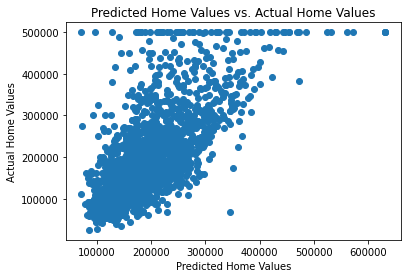

In [164]:
# Create a scatter plot of the predicted and actual values
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Home Values')
plt.ylabel('Actual Home Values')
plt.title('Predicted Home Values vs. Actual Home Values')
plt.show()

#### Discussion
I chose the linear regression model for my dataset because it is the one I am most familiar with from my classes. It is also logical to assume that there is a linear relationship between the median home value and median income.
Linear regression assumes that there is a linear relationship between the explanatory variable and the response variable and that the response variable is normally distributed for a fixed explanatory variable value. Thus, a general linear equation can be created to predict the response variable based on the values of the explanatory variable.

The results of exploratory data analysis on the data show a positive correlation between the median home value and median income. A correlation coefficient of 0.68 is calculated, which is slightly positive. The histograms and density plots show that distributions of the median home value and income. Box plots of the data represent the many outliers in both columns of data. An interesting observation is that the median house values seem to max out at $500,000. I am unsure why, but if the data was conducted through surveys, a median home value of $500,000 was probably the highest one could choose.

After fitting the training data using linear regression, the coefficients of the model are displayed. The equation shows that for every $10,000 increase in median income, the median home value increases by about $38,680.98. The model is then used for prediction on the test set. The mean absolute percentage error (MAPE) is surprisingly large, around 33 percent. Similarly, the R-squared value is 0.46, indicating a low but positive correlation between the two variables. A scatter plot of the predicted versus the actual home values of the test set is not tightly clustered, indicating that the model is not very accurate.

##### Additional Work

K-fold cross validation is used to evaluate the model's performance on different splits of train and test sets.

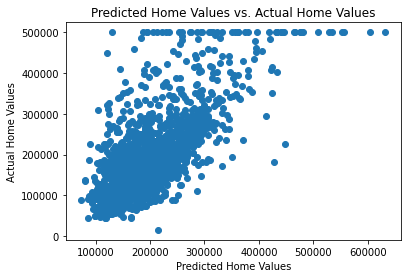

Mean absolute percentage error: 33.32315320207692
R^2: 0.4924318272588789


,predictions,actual
0,253698.738628,246000.0
1,177851.801919,154700.0
2,203220.441488,251800.0
3,174898.634065,218300.0
4,393966.480921,461600.0


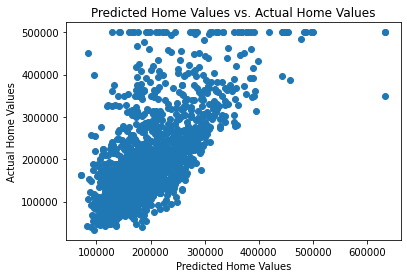

Mean absolute percentage error: 32.22800936309931
R^2: 0.4322949071693397


,predictions,actual
0,135854.036848,124000.0
1,174017.071045,104200.0
2,229385.772607,102600.0
3,217628.631437,121300.0
4,155737.265658,108200.0


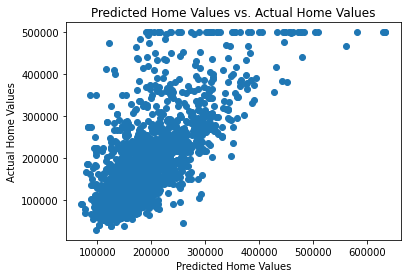

Mean absolute percentage error: 33.03625861953099
R^2: 0.457575897576997


,predictions,actual
0,96376.445137,225000.0
1,151100.279557,93500.0
2,171426.386538,173900.0
3,151369.164024,111500.0
4,149393.447721,191000.0


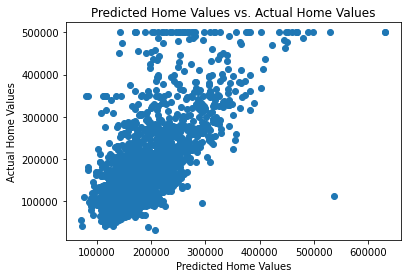

Mean absolute percentage error: 31.161582618785925
R^2: 0.4462584540083532


,predictions,actual
0,219866.750870,287500.0
1,137807.659687,154600.0
2,162673.464567,118100.0
3,313420.229678,294100.0
4,444889.706992,481500.0


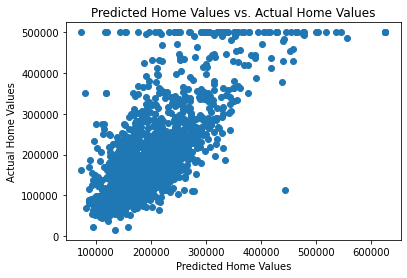

Mean absolute percentage error: 34.213641234373455
R^2: 0.5162567532962423


,predictions,actual
0,287523.015779,248200.0
1,134815.393108,62000.0
2,312445.296542,286300.0
3,122894.051093,139600.0
4,106204.172273,70100.0


In [165]:
# K-fold cross-validation
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Loop through each fold
for train_index, test_index in kf.split(X_train):
    # Create training and test sets
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Create linear regression model
    model = LinearRegression()

    # Fit the model to the training data
    model.fit(X_train_fold.reshape(-1, 1), y_train_fold)

    # Make predictions on the test set
    y_pred_fold = model.predict(X_test_fold.reshape(-1, 1))

    # Create a scatter plot of the predicted and actual values
    plt.scatter(y_pred_fold, y_test_fold)
    plt.xlabel('Predicted Home Values')
    plt.ylabel('Actual Home Values')
    plt.title('Predicted Home Values vs. Actual Home Values')
    plt.show()

    # Compute mean absolute percentage error (MAPE)
    mape = 100 * (abs(y_pred_fold - y_test_fold) / y_test_fold)
    print(f'Mean absolute percentage error: {mape.mean()}')
    
    # Compute R^2
    r2_fold = model.score(X_test_fold.reshape(-1, 1), y_test_fold)
    print(f'R^2: {r2_fold}')

    # Create dataframe of predictions
    predictions = pd.DataFrame({'predictions': y_pred_fold, 'actual': y_test_fold})
    display(predictions.head())



#### Another Way of Creating the Model
I used the Ordinary Least Squares (OLS) class from statsmodels to create a regression model of the data, as it provides a nice summary of statistics.


In [166]:
# Import ordinary squares linear regression and metrics from statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

The model is created and fitted to the training data. The summary of results is printed.

In [167]:
model = smf.ols(formula='median_house_value ~ median_income', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Fri, 22 Jul 2022   Prob (F-statistic):               0.00
Time:                        18:26:39   Log-Likelihood:            -2.5509e+05
No. Observations:               20000   AIC:                         5.102e+05
Df Residuals:                   19998   BIC:                         5.102e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.483e+04   1344.036     33.353

y = 44827.05 + 41903.44x


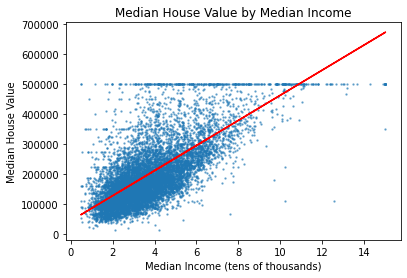

In [168]:
#Print the regression line equation
print(f'y = {model.params[0]:.2f} + {model.params[1]:.2f}x')

# Plot regression line
plt.scatter(median_income, median_house_value, s = 2, alpha = 0.5)
plt.plot(median_income, model.predict(median_income), color='red')
plt.xlabel('Median Income (tens of thousands)')
plt.ylabel('Median House Value')
plt.title('Median House Value by Median Income')
plt.show()
